### data preprocessing

In [ ]:
import pandas as pd
music_df = pd.read_csv("music_df.csv")

In [4]:
music_df.columns

Index(['lyrics', 'num_syllables', 'pos', 'year', 'fog_index', 'flesch_index',
       'num_words', 'num_lines', 'title', 'f_k_grade', 'artist',
       'difficult_words', 'num_dupes', 'neg', 'neu', 'compound', 'id',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'uri', 'analysis_url',
       'artist_with_features', 'year_bin', 'image', 'cluster', 'Gender'],
      dtype='object')

We list out all features from three aspects:

In [5]:
audio_features = ["danceability","energy","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms","time_signature"]
readability_features = ["num_words","num_lines","num_syllables","difficult_words","fog_index","flesch_index","f_k_grade"]
sentiment_features = ["neg","neu","pos","compound"]

Then some preprocessing with the year bins:

In [6]:
music_df["year_bin"]=music_df["year_bin"].apply(lambda x: "20"+x if x in ["00s","10s"] else "19"+x)

# Question 1

## 1.1 General analysis for the "formula" of popular songs across all years

## 1) acoustic features

To find out some "formula" to characterize the most popular songs in general, first, we examine single features from the audio_feature metrics by checking the standard deviations of the score distributions. If we find any feature score with the relatively small proportion of the standard deviation compared with its possible range, which we specify as less than 0.1, we identify this feature could be a good indicator of all popular songs across years. 

In [41]:
deviations = music_df[audio_features].std()
ranges = music_df[audio_features].max()-music_df[audio_features].min()
deviations[deviations/ranges<0.1]

speechiness             0.070125
instrumentalness        0.087393
duration_ms         64512.502623
time_signature          0.488598
dtype: float64

We can see among all deviations, four proportions are below 0.1 indicating relatively stable feature scores for all the most popular songs: speechiness, instrumentalness, duration_ms and time_signature, so next we furthur check the distribution of the four audio features:

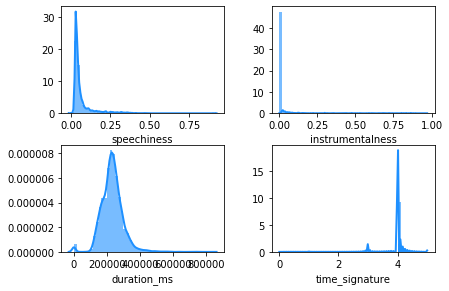

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(ncols=2,nrows=2)
fig.tight_layout()
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(music_df['speechiness'], color="", label="speechiness", **kwargs,ax=axs[0,0])
sns.distplot(music_df["instrumentalness"], color="dodgerblue", label="instrumentalness", **kwargs,ax=axs[0,1])
sns.distplot(music_df['duration_ms'], color="dodgerblue", label="duration ms", **kwargs,ax=axs[1,0])
sns.distplot(music_df['time_signature'], color="dodgerblue", label="time signature", **kwargs,ax=axs[1,1])
plt.show()

For the first two audio features, we can see the average levels of both the first two scores are close to 0 and both have long tails in their distributions, and we can compute the median scores of both to confirm it:

In [66]:
music_df[['speechiness','instrumentalness']].median()

speechiness         0.039900
instrumentalness    0.000003
dtype: float64

The low speechiness means the most popular songs tend to be non-speech-like, and in this sense rap music are less likely to be the most popular one due to its higher speechniness score. On the other hand, the low instrumentalness is what we expected, meaning the most popular songs tend to contain more vocal contents which are more likely to affect listeners than pure instrumental melodies. For the next two features, the music durations and time signature, we can see the they are also concentrated with low level variance and their median values are:

In [50]:
music_df[['duration_ms','time_signature']].median()

duration_ms       229253.5
time_signature         4.0
dtype: float64

To sum up for the acoustic features, those most popular songs tend to have very low levels of speechiness and instrumentalness, with song durations around 230000ms and more likely to take the time sigature of 4 beats per measure. 

## 2) readability features

Next in the same way, we examine the readability features:

In [53]:
r_deviations = music_df[readability_features].std()
r_ranges = music_df[readability_features].max()-music_df[readability_features].min()
r_deviations[r_deviations/r_ranges<0.1]

flesch_index    8.160546
f_k_grade       1.227265
dtype: float64

we plot the distribution of the two readability features:

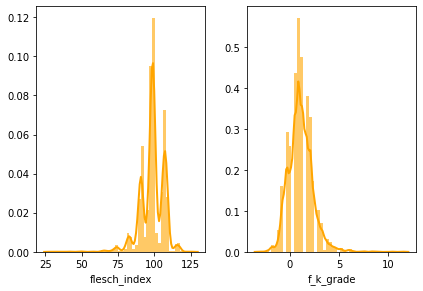

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(ncols=2,nrows=1)
fig.tight_layout()
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(music_df['flesch_index'], color="orange", label="Flesch reading ease score", **kwargs,ax=axs[0])
sns.distplot(music_df["f_k_grade"], color="orange", label="Flesch–Kincaid grade level of lyrics", **kwargs,ax=axs[1])
plt.show()

We also check their medians respectively:

In [55]:
music_df[['flesch_index',"f_k_grade"]].median()

flesch_index    99.23
f_k_grade        0.90
dtype: float64

To sum up for the readabiliy features, those most popular songs tend to take the Flesch reading ease scores around 99 and the Flesch–Kincaid grade level of 0.9, both of which indicate the lyrics of most popular songs are most likely extremely easy to read according to [here](https://yoast.com/flesch-reading-ease-score/) and [here](https://readable.com/blog/the-flesch-reading-ease-and-flesch-kincaid-grade-level/).

## 3) sentiment features

Finally for sentiment features, we directly check their standard deviations to see if any one is significantly less than 0.1 because we know their ranges are all from 0 to 1.

In [58]:
s_deviations = music_df[sentiment_features].std()
s_deviations

neg         0.066026
neu         0.099435
pos         0.093612
compound    0.755299
dtype: float64

So only the standard deviations of the negativity scores is significantly below 1, and we plot its distribution:

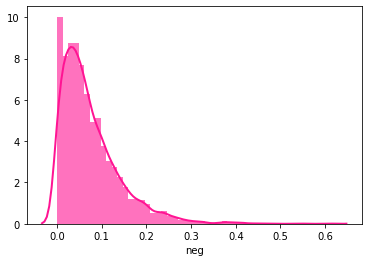

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(music_df['neg'], color="deeppink", label="Negativity score", **kwargs)
plt.show()

and we check its median, which is very close to 0, meaning a low level of negativity association with the lyrics of the most popular songs:

In [65]:
music_df["neg"].median()

0.057

## Conclusions of the general analysis 

To sum up for the general analysis on the "formula" of all the most popular songs across all years, they are characterized by the following features:
- very low levels of speechiness and instrumentalness
- song duration around 230000ms or approximately 4 minutes
- time sigature of 4 beats per measure
- lyrics which are extremely easy to read
- lyrics with low level of negative sentiments

## 1.2 Temporal analysis of popular songs over decades

Although the general analysis can provide a big picture of what features characterize the most popular songs from the mid twentieth century to the begining of the twenty first century, we also expect some variances in those features during the long period of time. So next, we take a closer look at any possible trend of acoustic, readability and sentiment features as well as the contents of song lyrics by the decade.  

## 1) trends of acoustic, readability and sentiment features

We first aggregate acoustic feature scores by taking the averages for each decade:

In [87]:
a_means = music_df[audio_features+["year_bin"]].groupby("year_bin").mean()
diff = pd.DataFrame(a_means.apply(lambda x: max(x)-min(x))).transpose()
diff.index = ["difference"]
a_means_diff = a_means.append(diff)
a_means_diff

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1950s,0.515941,0.405510,-11.450249,0.859729,0.057941,0.742500,0.012369,0.195126,0.606459,114.409226,157174.538462,3.701357
1960s,0.542838,0.517368,-9.902272,0.793834,0.049366,0.470477,0.022574,0.196478,0.667862,118.955349,169146.452794,3.834297
1970s,0.579640,0.576003,-10.152209,0.737984,0.046494,0.333978,0.024345,0.179496,0.652274,117.213571,235339.317829,3.927132
1980s,0.626515,0.633501,-9.388511,0.698287,0.043483,0.228976,0.021804,0.163635,0.629270,119.419611,254108.171278,3.953887
1990s,0.622353,0.617188,-8.143383,0.669151,0.068163,0.202947,0.014422,0.178940,0.544125,112.665970,261502.214605,3.876304
2000s,0.653979,0.690682,-5.723032,0.612081,0.106410,0.149382,0.008496,0.171159,0.565461,117.422181,242039.297987,3.958389
2010s,0.633182,0.719591,-5.289100,0.675214,0.081462,0.125818,0.008369,0.189498,0.538455,121.558256,224494.741453,3.980769
difference,0.138037,0.314081,6.161148,0.247648,0.062928,0.616683,0.015976,0.032843,0.129407,8.892286,104327.676144,0.279412


We can observe the majority of acoustic features changed monotonically or almost monotonically. Considering the possible ranges of these scores, we select four most sailient changes: energy, loudness, acousticness, and mode. Then we plot these changes:

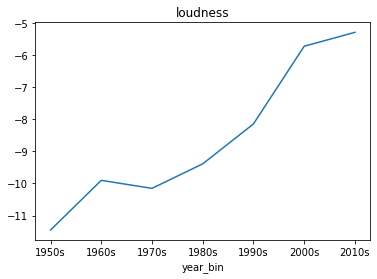

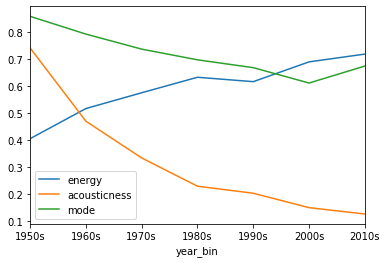

In [103]:
plt.title("loudness")
plt.xlabel("year_bin")
plt.plot(a_means["loudness"])
a_means[["energy", "acousticness", "mode"]].plot.line()
plt.show()

Next we apply the same procedures to sentiment features.

In [106]:
s_means = music_df[sentiment_features+["year_bin"]].groupby("year_bin").mean()
s_diff = pd.DataFrame(s_means.apply(lambda x: max(x)-min(x))).transpose()
s_diff.index = ["difference"]
s_means_diff = s_means.append(s_diff)
s_means_diff

,neg,neu,pos,compound
1950s,0.062457,0.742805,0.194733,0.690462
1960s,0.070778,0.763800,0.165455,0.518240
1970s,0.070116,0.762017,0.167856,0.568366
1980s,0.071054,0.768663,0.160292,0.548810
1990s,0.074946,0.770779,0.154277,0.528209
2000s,0.079588,0.786409,0.134021,0.436417
2010s,0.085365,0.771147,0.143470,0.443677
difference,0.022908,0.043604,0.060712,0.254045


We can see the overall decreasing of the compound sentiment scores over decades.

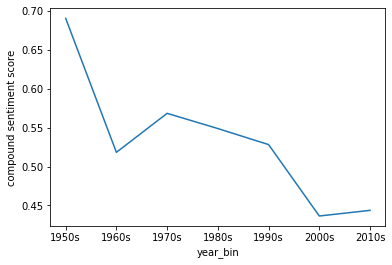

In [116]:
plt.ylabel("compound sentiment score")
plt.xlabel("year_bin")
plt.plot(s_means["compound"])
plt.show()

Finally we apply the same procedures to readability features.

In [112]:
r_means = music_df[readability_features+["year_bin"]].groupby("year_bin").mean()
r_diff = pd.DataFrame(r_means.apply(lambda x: max(x)-min(x))).transpose()
r_diff.index = ["difference"]
r_means_diff = r_means.append(r_diff)
r_means_diff

,num_words,num_lines,num_syllables,difficult_words,fog_index,flesch_index,f_k_grade
1950s,172.909502,25.891403,209.871041,13.117647,4.561086,97.440724,1.257014
1960s,201.562620,30.321773,244.050867,14.851638,4.546435,97.763776,1.200963
1970s,252.555039,37.683721,303.933488,17.227907,4.556279,98.345674,1.125891
1980s,287.880105,44.511199,346.388538,19.011858,4.447431,98.349117,1.057312
1990s,366.645306,52.676602,437.016393,27.463487,4.596721,99.131893,1.040984
2000s,455.842953,61.726174,537.524698,32.947651,4.774228,99.413315,1.113423
2010s,413.952991,57.076923,492.409615,28.269231,4.752991,98.602970,1.213889
difference,282.933451,35.834772,327.653657,19.830004,0.326797,1.972591,0.216030


We can see three obvious changes in num_words, num_lines and num_syllables. But these changes are actually correlated with each other and can be represented by one, the change in num_words, As before we plot the change in number of words over decades:

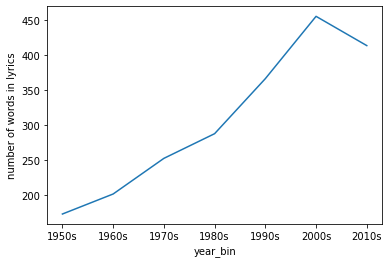

In [115]:
plt.ylabel("number of words in lyrics")
plt.xlabel("year_bin")
plt.plot(r_means["num_words"])
plt.show()

## 2) content analysis of song lyrics over decades

Next we directly look at the song lyrics to explore the main themes of the most popular songs over years. Instead of using the topic modelling by LDA, we directly compute the tf-idf scores for each word in song lyrics by the decade. Then we select words with highest scores to identify some trends over decades.  

In [243]:
import nltk
import string

def get_lemmas(text):

    stop = nltk.corpus.stopwords.words('english') + list(string.punctuation)
    tokens = [i for i in nltk.word_tokenize(text.lower()) if i not in stop]
    lemmas = [nltk.stem.WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in tokens]
    return lemmas

def get_wordnet_pos(word):

    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": nltk.corpus.wordnet.ADJ,
                "N": nltk.corpus.wordnet.NOUN,
                "V": nltk.corpus.wordnet.VERB,
                "R": nltk.corpus.wordnet.ADV}

    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)

def wordCount(lst):
    '''
    This function return a dictionary of word counts
    from a list of words.
    '''
    result = {}
    for word in lst:
        good = True
        for punct in string.punctuation:
            if punct in word:
                good = False
                break
        if good:
            result[word] = result.setdefault(word,0)+1
    return result 

def mergCount(dictList):
    '''
    This function takes a list of dictionary of word counts as input
    and returns a dictionary of word counts by adding counts of the 
    same words from the input.
    '''
    from collections import Counter 
    result = Counter()
    for d in dictList:
        result += Counter(d)
    return dict(result)

def tf_idf(old_dict,merge_df,tnum_doc):
    '''
    This function produces a dictionary of the tf-idf scores
    based on the original dictionary of word counts.
    '''
    new_dict = {}
    import math
    nterms = sum(list(old_dict.values()))
    for word in old_dict:
        ndoc = 0
        for i in range(tnum_doc):
            if word in merge_df.iloc[i]:
                ndoc+=1
        idf = math.log(tnum_doc/ndoc)
        tf = old_dict[word]/nterms
        new_dict[word] = idf*tf
    return new_dict

def topWords(df, colname,num_top,tfidf=False):
    '''
    This function returns the top words from the one column of
    the dataframe by the decade.
    Caution: running this function may take a while.
    '''
    lyrics = df[colname].apply(get_lemmas)
    counts = lyrics.apply(wordCount)
    train_data = pd.concat([counts,df['year_bin']],axis=1)
    merge_series = train_data.groupby("year_bin").agg(mergCount)[colname]
    # consider the tf-idf scores for words in song lyrics
    if tfidf:
        tfidf_list=[]
        tnum_doc = 7
        for i in range(tnum_doc):
            tfidf_list.append(tf_idf(merge_series.iloc[i],merge_series,tnum_doc))
        series = pd.Series(tfidf_list)
        series.index = merge_series.index
        merge_series = series
    sort_series = merge_series.apply(lambda x: [y[0] for y in sorted(x.items(),key=lambda z:z[1],reverse=True)[:num_top]])
    for year in sort_series.index:
        print(year,sort_series[year])  

We first apply the topWords function to song lyrics and find out the top 10 words by the decade without taking account of the tf-idf score:

In [332]:
topWords(music_df,"lyrics",20)

1950s ['love', 'oh', 'go', 'baby', 'get', 'know', 'say', 'come', 'heart', 'like', 'na', 'well', 'never', 'one', 'make', 'dream', 'gon', 'time', 'tell', 'see']
1960s ['love', 'get', 'baby', 'know', 'oh', 'go', 'come', 'say', 'yeah', 'na', 'like', 'girl', 'make', 'time', 'see', 'let', 'one', 'la', 'day', 'well']
1970s ['love', 'get', 'oh', 'know', 'baby', 'go', 'come', 'yeah', 'like', 'say', 'na', 'make', 'take', 'feel', 'time', 'let', 'see', 'want', 'way', 'never']
1980s ['love', 'get', 'na', 'oh', 'know', 'say', 'baby', 'go', 'time', 'want', 'make', 'come', 'like', 'yeah', 'take', 'feel', 'let', 'night', 'one', 'ca']
1990s ['get', 'love', 'na', 'know', 'baby', 'go', 'yeah', 'like', 'come', 'make', 'want', 'say', 'oh', 'let', 'see', 'one', 'time', 'wan', 'ca', 'never']
2000s ['get', 'know', 'like', 'love', 'go', 'na', 'make', 'baby', 'oh', 'girl', 'say', 'see', 'yeah', 'let', 'come', 'want', 'one', 'ca', 'wan', 'take']
2010s ['get', 'like', 'oh', 'na', 'love', 'know', 'go', 'yeah', 'bab

So we can see some prevalent words across decades such as "love","baby" plus some common verbs such as "get", "say","go" and "know", which confirms the eternal theme of love for the most popular songs across decades, and also that lyrics of the most popular songs tend to be extremely easy to read. But on the other hand we cannot detect obvious distinctions between decades if we only consider the most common words in song lyrics, so next we apply the topWords function to words in song lyrics with tf-idf scores:

In [247]:
topWords(music_df,"lyrics",20,True)

1950s ['lolli', 'alvin', 'jenny', 'peggy', 'lollipop', 'kew', 'bomp', 'bernadine', 'glendora', 'susie', 'kewpie', 'bung', 'dooley', 'transfusion', 'mambo', 'honeycomb', 'blueberry', 'bah', 'bom', 'dee']
1960s ['boogety', 'jude', 'rhonda', 'bossa', 'barbara', 'ann', 'judy', 'kangaroo', 'nananana', 'denise', 'hanky', 'panky', 'bernadette', 'senora', 'safari', 'submarine', 'bismark', 'vandellas', 'georgy', 'pussycat']
1970s ['rollercoaster', 'lola', 'bennie', 'hada', 'navy', 'boogie', 'aaah', 'dazz', 'swearin', 'rubberband', 'copa', 'copacabana', 'eres', 'rainin', 'angie', 'lucy', 'bom', 'comma', 'sylvia', 'shambala']
1980s ['sa', 'gloria', 'zoomin', 'funkytown', 'urgent', 'eileen', 'kýrie', 'mickey', 'casbah', 'eléison', 'coo', 'dōmo', 'ghostbusters', 'sara', 'adult', 'bamba', 'jeannie', 'material', 'nightshift', 'takedown']
1990s ['duuh', 'shoop', 'tootsie', 'nigga', 'melanie', 'humpty', 'freek', 'niggaz', 'murderer', 'doop', 'kris', 'duba', 'dop', 'piss', 'fuck', 'hump', 'emma', 'kah',

From these top words in terms of their tf-idf scores, we can identify a vague trend that lyrics have been becoming 1)more angry and antisocial over time, 2)more detached from the nature and the public and more attached to personal emotional expressions.

From the 1990s, words such as "nigga","murderer","piss","fuck","bitch","shit", "freek" appeared and these words were rarely observed before 1990s. 

In constrast, from 1950s to 1980s, we find words such as "lollipop","knewpie","honeycomb","kangaroo",'safari',"blueberry","submarine","rollercoaster",'navy',
'gloria','coo'.

## Conclusions of the temporal analysis

To sum up for the temporal analysis, we have identified several trends of the most popular songs over decades from the acoustic features, sentiment features, readability features and song lyrics contents:

- increase in loudness and energy, decrease in acousticness, and music melody becoming more inclined to minor mode
- decrease in compound sentiment score
- increase in the the number of words in lyrics, while time duration remaining roughly the same, meaining increase in word density
- the emotional bias of song lyrics towards more angry and antisocial
- the theme of song lyrics becoming more detached from nature and the public but more attached to personal emotional expression.

Finally, despite all the trends listed above, we do detect the eternal theme for most of the popular songs: love.

# Question 2

1) For the relevant theories driving the general "formula" for the most popular songs across all decades, I take one point from the conclusions of the general analysis:  lyrics of popular songs tend to be easy to read. They are easy to read not only due to some apparent reasons such as the wider recognition by people from various educational levels and the fact that simple words are easier to remember, but also because simple or small words contribute to "the tension in the popular lyric between its colloquial, vernacular language and its use in a hightened, elevated way framed by the music." and "an aural contradiction between the glibness of the lyric and the uncertainty of the voice"(Frith 1996). The legisign of this tension or contradiction could be partly confirmed by the observations that the repeatitions of simple words in lyrics to form the rhetorics amenable to further elevation and framing by music. 


For explaining the temporal features of the most popular songs over decades, I take one point from the conclusions of the temporal analysis above: the themes of song lyrics have become more detached from nature and the public but more attached to personal emotional expressions. One reason could be the rise of individualism in the U.S. these years. To test the greater indivisualism, we can find empirical evidence using three indicators: the U.S. marriage rate, the household size and newborn baby names. Lower marriage rates and smaller household sizes tend to be observed in a more individualistic society(Hofstede G. 2001), and rates of top 10 most common names and an index of individualism were negatively correlated(Hofstede et al., 2010). So we can check the trends of the three indicators as evidence for the greater indivisualism in the U.S these years. 

2) For the general feature of rhetoric in song lyrics, we compute the proportion of the number of repetative lines in the total number of lines in lyrics for each song, and plot the distribution of proportions for all songs:

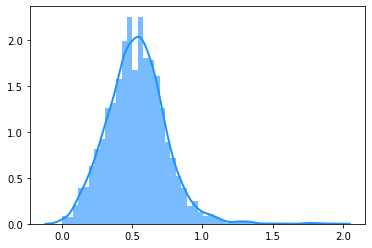

In [250]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(music_df['num_dupes']/music_df['num_lines'], color="dodgerblue", label="lyrical repeatitions", **kwargs)
plt.show()

The median, standard deviation and range of the distribution are:

In [253]:
proportions = (music_df['num_dupes']/music_df['num_lines'])
print("median: ",proportions.median())
print("standard deviation: ", proportions.std())
print("range: ",proportions.max()-proportions.min())

median:  0.5294117647058824
standard deviation:  0.20902722707492022
range:  1.9333333333333333


We can see from the above results that on average about half of the song lyrics are repeated at least one time with relative small standard deviation compared with the range, and this average level of repeatition  is way greater than plain words in all forms of literature and thus confirm that the rhethoric by repeatition is prevalent in popular songs and partly explain why easy-to-read words can still construct rhetorics needed to produce the tension or contradiction framed by music.  

Next we turn to the temporal anaysis of the empirical evidence indicating greater individualism in the U.S.. First, for the indicator of the househould size, we download U.S. household data from year 1970 to 2018 from [here](https://www.statista.com/statistics/183648/average-size-of-households-in-the-us/), which directly shows the average household sizes in the U.S. by year: 

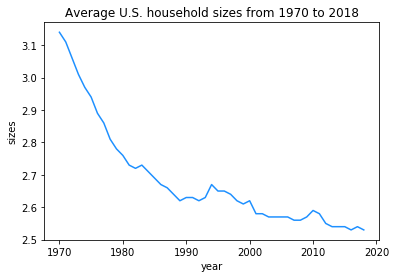

In [279]:
hsize = pd.read_csv("households.csv",names = ["year","sizes"])
sns.lineplot(x = "year", y = "sizes",data = hsize, color="dodgerblue")
plt.title("Average U.S. household sizes from 1970 to 2018")
plt.show()

From the graph we can clearly see the downward trend of average household size in the U.S, which is one indication of the greater individualism over years. Next we download data about the number of marriages from 1990 to 2017 in the U.S. from [here](https://www.statista.com/statistics/195931/number-of-marriages-in-the-united-states-since-1990/) and data about the total population in the corresponding years from [here](https://www.google.com/publicdata/explore?ds=kf7tgg1uo9ude_&hl=en&dl=en#!ctype=l&strail=false&bcs=d&nselm=h&met_y=population&scale_y=lin&ind_y=false&rdim=country&idim=country:US&ifdim=country&hl=en_US&dl=en&ind=false), then we check the marriage rates in the U.S from year 1990 to 2017 by divding the number of marriage by the total population for each year, and plot the trend:

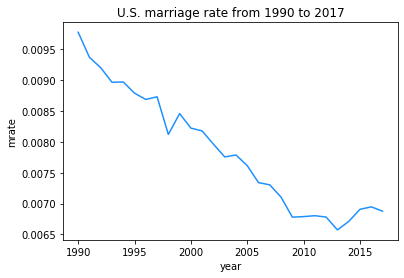

In [278]:
population  = pd.read_csv("population.csv")
nmarriage = pd.read_csv("marriages.csv",names=['year',"nmarriage"])
nmarriage['year']=nmarriage['year'].apply(lambda x:int("19"+x[-2:] if x[-2]=='9' else "20"+x[-2:]))
marriage = pd.merge(nmarriage,population,on="year")
marriage['mrate'] = marriage['nmarriage']*1000000/marriage['population']
sns.lineplot(x = "year", y = "mrate",data = marriage, color="dodgerblue")
plt.title("U.S. marriage rate from 1990 to 2017")
plt.show()

Again we can see a clearly downward trend of U.S. marriage rate from year 1990 to 2017, which is another indication of the greater individualism over years. Finally we check the rates of top 10 most common names by gender from year 1950 to 2014, and its data can be download from [here](https://www.kaggle.com/kaggle/us-baby-names), and then process the data by gender and by year before plotting the trends for both genders:

In [324]:
names = pd.read_csv("National_Names.csv")
female_names = names[(names["Gender"]=="F") & (names["Year"]>=1950)]
male_names = names[(names["Gender"]=="M") & (names["Year"]>=1950)]

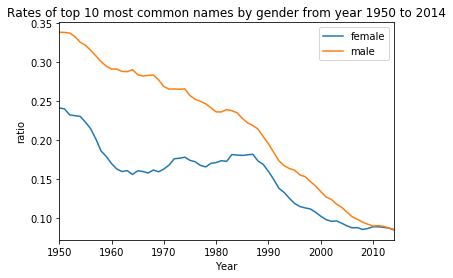

In [331]:
# compute the proportion of counts of the top 10 common names in total counts 
# of names for each year
top10 = lambda x: sum(x[:10])
fnames = female_names[["Year","Count"]].groupby("Year").agg([top10,sum])
fnames.columns = ["top10","total"]
fnames['female'] = fnames["top10"]/fnames["total"]

# we do the same for male names
mnames = male_names[["Year","Count"]].groupby("Year").agg([top10,sum])
mnames.columns = ["top10","total"]
mnames['male'] = mnames["top10"]/mnames["total"]

ratios = pd.concat([fnames["female"],mnames["male"]],axis=1)
ratios.plot()
plt.title("Rates of top 10 most common names by gender from year 1950 to 2014")
plt.ylabel("ratio")
plt.show()

We can see from the above graph the downward trends of the top 10 common name rates for both genders, which is another indication of the growing individualism in the U.S. over years.

3) For the simple words in lyrics of the most popular songs, I consider the prevalence of rhetorics in song lyrics using repeatition can partly confirm the fact that words in song lyrics are easy to read. On the one hand, repeatitions of lyrical words contribute to the glibness of the lyrics and thus the formation of tension or contradiction between the simple words and the uncertainty of the voice framed and heightened by the music. If lyrics were hard to read, they would leave little room for further interpretation and variation framed by the music and voice. On the other hand, repeatitons are more effective and affective by using simple words which are easier for people to sing,remember and broadcast, and thus can significantly increase the popularity of the song. 

For the question that why the growing individualism contributes to the fact that popular songs become more attached to personal emotional expressions, the answer also lies in the mutual promotion and influence between the growing individualism in the society and personal emotional expressions in the song lyrics. On the one hand, the pop music can be the  reflection of the outside world and thus one product of the social ramifications caused by the growing individualism, so in this sense it plays the role of the emotional outlet for each person in the society to display and commnicate his or her personality to others, and due to the rhetorics in popular songs, this kind of commnication can be both effective and affective. Therefore, more popular songs are created to meet people's desire to express their personality by adding more emotional expressions in lyrics. On the other hand, the emotional expressions may also in turn contribute to the growing individualism in society because they are highly influential, especially to certain groups of people, and can thus become symbols of certain type of personality when people are singing them, which help amplify people's personality and further focus on their own concerns and appeals. To sum up, this mutual reinforcing relationship can be summarized by the two functions of popular music proposed by Simon Frith: the first function of self definition and of creating a place in society for people, and the second function of "managing the relationship between our public and private emotional life"(Frith 1987).

# References

[1] FRITH, Simon. (1996) Performing Rites: On the Value of Popular Music (Cambridge, MA: Harvard University Press).

[2] FRITH, Simon. (1987) ‘Towards an Aesthetic of Popular Music,’ in Richard Leppert and Susan McClary (eds.), Music and Society: The Politics of Composition, Performance and Reception (Cambridge: Cambridge University Press), 133-149.

[3] Hofstede G. (2001). Culture's Consequences: Comparing Values, Behaviors, Institutions, and Organizations Across Nations, 2nd Edn.

[4] Hofstede G., Hofstede J. H., Minkov M. (2010). Cultures and Organizations: Software of the Mind, 3rd Edn. New York, NY: McGraw-Hill.